# Edible mushrooms classifier

# 1. Imports and Data loading

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns

mushroom_data = pd.read_csv("data/mushroom_cleaned.csv")
y = mushroom_data['class']  # Target variable
x = mushroom_data.iloc[:, :-1]
mushroom_data.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


# 2. Data Cleaning and Variable Selection

<Axes: >

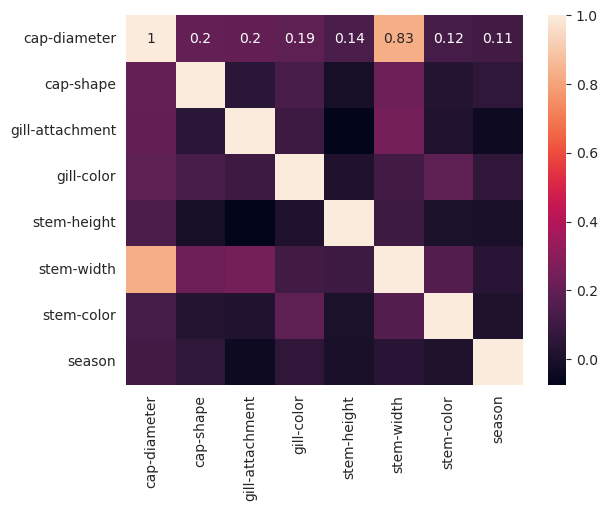

In [7]:
stratified_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=142)

index_training_data, index_test_data = next(stratified_shuffle_split.split(x, y))

x_train_set = mushroom_data.loc[index_training_data, x.columns]
y_train_ = mushroom_data.loc[index_training_data, "class"]

x_test_set = mushroom_data.loc[index_test_data, x.columns]
y_test_ = mushroom_data.loc[index_test_data, "class"]
sns.heatmap(x.corr(), annot=True)


# 3. Training, Hyperparameter tuning, etc

In [9]:
model = LogisticRegressionCV(Cs=10, cv=3, penalty='l1', solver='liblinear', random_state=142)
model.fit(x_train_set, y_train_)

LogisticRegressionCV(cv=3, penalty='l1', random_state=142, solver='liblinear')

# 4. Predictions and Performance Visualization

              precision    recall  f1-score   support

           0       0.61      0.55      0.58      7308
           1       0.66      0.71      0.69      8903

    accuracy                           0.64     16211
   macro avg       0.64      0.63      0.63     16211
weighted avg       0.64      0.64      0.64     16211



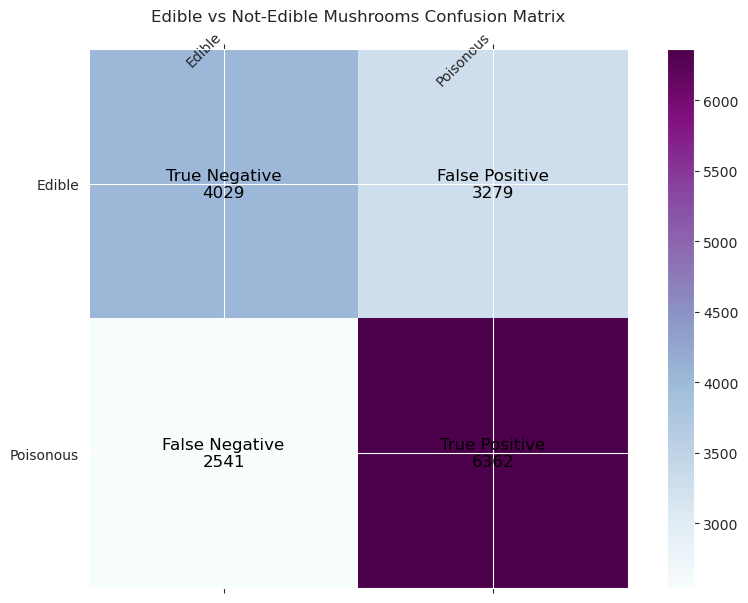

In [12]:
predict = model.predict(x_test_set)

print(classification_report(y_test_, predict))
conf_matrix = confusion_matrix(y_test_, predict)

class_names = ['Edible', 'Poisonous']

# Define the labels for the matrix
labels = [["True Negative", "False Positive"], ["False Negative", "True Positive"]]

# Plotting the confusion matrix using matplotlib
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(conf_matrix, cmap='BuPu')
plt.colorbar(cax)

# Set ticks and labels
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, f"{labels[i][j]}\n{conf_matrix[i, j]}",
                ha="center", va="center", color="black", fontsize=12)

ax.set_title('Edible vs Not-Edible Mushrooms Confusion Matrix')
plt.show()
